In [1]:
import numpy as np
from ikpy.chain import Chain
from ikpy.link import OriginLink, URDFLink

In [89]:
# В URDF, единицы измерения являются метры и радианы 
robot_chain = Chain(name='robot_arm', links=[
    URDFLink(
        name="base",
        bounds=(-np.pi/2, np.pi/2), # от -90 до 90
        origin_translation=[0, 0, 0],
        origin_orientation=[0, 0, 0],
        rotation=[0, 0, 1],
    ),
    # Первое звено (соединение с базой, плечо)
    URDFLink(
        name="shoulder",
        bounds=(-2.0071, 1.1345),
        origin_translation=[0, 0, 0.02],
        origin_orientation=[0, 0, 0],
        rotation=[0, -1, 0],
    ),
    # Второе звено (локоть)
    URDFLink(
        name="elbow",
        bounds=(-1.7104, 1.4312),
        origin_translation=[0, 0, 0.105],
        origin_orientation=[0, 0, 0],
        rotation=[0, 1, 0],
    ),
    # Третье звено (запястье)
    URDFLink(
        name="wrist",
        bounds=(-1.2915, 1.8500),
        origin_translation=[0, 0, 0.096],
        origin_orientation=[0, 0, 0],
        rotation=[0, 1, 0],
    ),
    # Четвертое звено (крутит захват)
    URDFLink(
        name="wrist_rotational",
        bounds=(-np.pi/2, np.pi/2),
        origin_translation=[0, 0, 0.065],
        origin_orientation=[0, 0, 0],
        rotation=[0, 0, 1],
    ),
    # Манипулятор (захват)
    URDFLink(
        name="gripper",
        bounds=None,
        origin_translation=[0, 0, 0.11],
        origin_orientation=[0, 0, 0],
        rotation=None,
        joint_type='fixed',
    )
])

Передом считаем где перед манипулятором металическая платформа

pwm 10 = 90, значит вправо будет уменьшение угла, влево увеличение
pwm 11 = 115, значит наклон вперед будет уменьшение угла, назад увеличение
pwm 12 = 98, значит наклон вперед будет увеличение угла, назад уменьшение
pwm 13 = 74, значит наклон вперед будет увеличение угла, назад уменьшение
pwm 14 = 90, значит поворот клешни влевл будет увеличение угла, вправо уменьшение
pwm 15 = 142, закрытый - уменьшаем угл открываем

In [4]:
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D

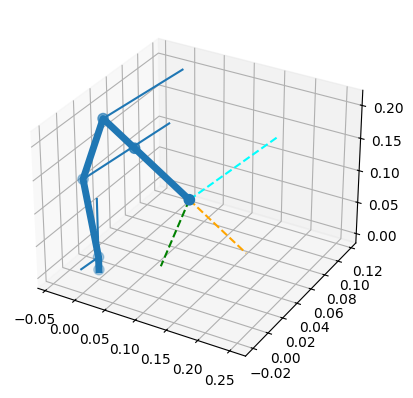

In [90]:
ax = matplotlib.pyplot.figure().add_subplot(111, projection='3d')

robot_chain.plot(robot_chain.inverse_kinematics([0.15, 0, 0.15]), ax, show=True)
matplotlib.pyplot.show()

In [81]:
angles_radians = robot_chain.inverse_kinematics([0.15, -0.05, 0.15])
angles_radians

array([-0.32175055,  0.17715142,  0.33843459,  1.80928127,  0.        ,
        0.        ])

In [82]:
angles_degrees = np.degrees(angles_radians)
angles_degrees

array([-18.43494882,  10.15002898,  19.39087382, 103.66418092,
         0.        ,   0.        ])

In [85]:
74 + 103.6

177.6

Значения сервов при x = 0.15 y = -0.05, z = 0.1
pwm10 90 - 18 = 72
pwm11 115 + 22.2 = 137.2
pwm12 98 + 55.4 = 153.4
pwm13 74 + 90.7 = 164.7

In [73]:
74 + 90.7

164.7

Значения сервов при x = 0.15 y = -0.05 z = 0.05
pwm10 90 - 19 = 71
pwm11 115 + 24.9 ~= 140
pwm12 98 + 78 = 176
pwm13 74 + 80 = 154

Значения сервов при x = 0.1 y = 0.05 z = 0.0 (то есть поворот вправо)
pwm10 90 - 26 = 64
pwm11 115 + 19 = 134
pwm12 98 + 81 = 179
pwm13 74 + 96 = 170

Значения сервов при x = 0.1 y = -0.05 z = 0.0 (то есть поворот влево) погрешность по x ~= 0.01 по y ~= 0.02
pwm10 90 + 26 = 116
pwm11 115 - 19 = 96
pwm12 98 + 81 = 179
pwm13 74 + 96 = 170

In [9]:
robot_chain.links[0]

URDF Link base :
    Type : revolute
    Bounds : (0, 3.14)
    Origin Translation : [0 0 0]
    Origin Orientation : [0 0 0]
    Rotation : [0 0 1]
    Translation: None